In [133]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [134]:
# Import data
df = pd.read_csv('new_cleaned.csv')
df.head()

,country,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,...,Volunteering,Bird watching,Conference tourism,Cultural tourism,Diving and Sport Fishing,Hunting tourism,Mountain climbing,Wildlife tourism,business,Package Tour
0,0,0,0,0,0,0,0,0,13.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,1,1,1,1,0,11.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,8,0,0,0,0,0,0,0,9.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,1,1,1,1,1,10.0,3.0,...,0,0,0,0,0,0,0,1,0,1
4,11,0,0,0,0,0,0,0,11.0,3.0,...,0,0,0,0,0,0,0,1,0,0


In [135]:
df.shape

(2138, 35)

In [136]:
# Check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         2138 non-null   int64  
 1   package_transport_int           2138 non-null   int64  
 2   package_accomodation            2138 non-null   int64  
 3   package_food                    2138 non-null   int64  
 4   package_transport_tz            2138 non-null   int64  
 5   package_sightseeing             2138 non-null   int64  
 6   package_guided_tour             2138 non-null   int64  
 7   package_insurance               2138 non-null   int64  
 8   night_mainland                  2138 non-null   float64
 9   night_zanzibar                  2138 non-null   float64
 10  first_trip_tz                   2138 non-null   int64  
 11  most_impressing                 2138 non-null   object 
 12  total_cost                      21

# Multiple Linear Regression

In [137]:
# Define target and features and add a constant term 
y = df.total_cost
X = df.drop(['total_cost', 'most_impressing'], axis=1)


X.head(n=2)

,country,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,...,Volunteering,Bird watching,Conference tourism,Cultural tourism,Diving and Sport Fishing,Hunting tourism,Mountain climbing,Wildlife tourism,business,Package Tour
0,0,0,0,0,0,0,0,0,13.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,1,1,1,1,0,11.0,0.0,...,0,0,0,0,0,0,0,1,0,1


## Creating a train and test dataset

In [149]:
from sklearn.model_selection import train_test_split


Without splitting the data.

In [139]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [140]:
# Calculate intercept and coefficient
intercept = model.intercept_
coefficients = model.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

Intercept: -2762480.0534
Coefficients: [ 4.28492090e+03  2.49516789e+06  1.88499767e+06 -1.13090344e+04
  7.53806176e+05  1.44226657e+06  3.49671303e+05  2.81094996e+05
  1.66261715e+05  1.47604923e+05  6.25205431e+05  9.53639055e+05
  3.11948896e+06  6.24439446e+06  4.35989383e+06  3.62186758e+06
  3.47666724e+06  7.16167832e+06  7.40780121e+05  1.49276460e+06
 -2.30297897e+06  3.28776749e+05 -1.22390598e+06  3.50426823e+05
 -1.33713632e+06  7.15570422e+04 -1.02120150e+06  2.03868593e+06
  2.06965826e+05 -1.37893633e+06  1.01416665e+06 -1.44637028e+06
  2.85579647e+05]


In [141]:
y_hat = model.predict(X)

In [142]:
# Calculate r-squared 
print("R-squared:", r2_score(y, y_hat).round(3))

R-squared: 0.334


This model explains about 33% of the variation in `total_cost`.

<AxesSubplot:xlabel='total_cost'>

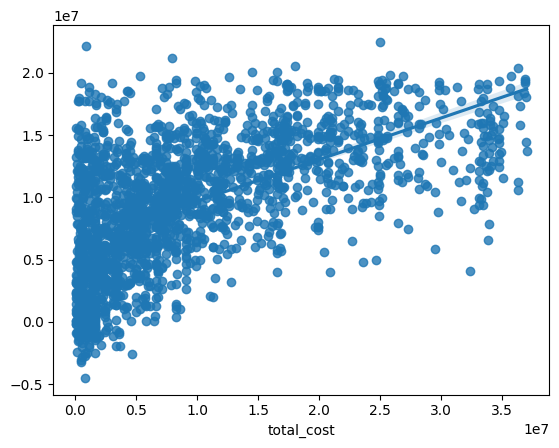

In [143]:
sns.regplot(y,y_hat)

In [144]:
print(f'Residuals: {y-y_hat}')
print("RMSE: ", np.sqrt(np.mean(np.square(y-y_hat))))  #RMSE
print("MAE", np.mean(abs(y-y_hat)))                 #MAE


Residuals: 0      -7.220623e+06
1      -2.795905e+06
2      -6.677728e+05
3      -1.248213e+07
4      -9.084383e+06
            ...     
2133   -3.301313e+06
2134   -4.960812e+06
2135   -2.684397e+06
2136   -5.887221e+06
2137    3.092751e+05
Name: total_cost, Length: 2138, dtype: float64
RMSE:  7234813.263847945
MAE 5300924.91681738


In [145]:
#RMSE/MAE computation using sklearn library
print("RMSE: ", np.sqrt(mean_squared_error(y, y_hat)))
print("MAE", mean_absolute_error(y, y_hat))

RMSE:  7234813.263847945
MAE 5300924.91681738


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1710, 33)
(428, 33)
(1710,)
(428,)


After splitting the dataset into a test and train we will be importing the Linear Regression model.

In [146]:
model2 = LinearRegression()

# Fit the model with training data
model2.fit(X_train,y_train)

LinearRegression()

Make predictions on the test data set.

In [147]:
# making predictions
predictions = model2.predict(X_test)

Evaluate the model with metrics

In [148]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  52835265615869.17
mean_absolute_error :  5343120.428466369


<AxesSubplot:xlabel='total_cost'>

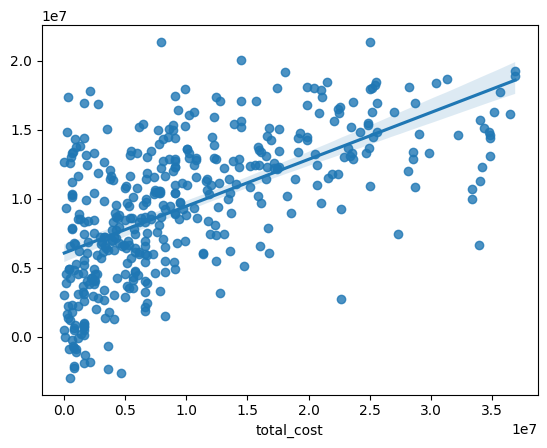

In [151]:
sns.regplot(y_test, predictions)